In [1]:
import requests
import pandas as pd
from config import constants,api_key
import module

In [5]:
POPULAR_POST_ENDPOINT = "/getTopPopularPosts"

## Making API call to Reddit api

In [ ]:

querystring = {"time":"year"}# required parameter
headers = {
	"X-RapidAPI-Key": api_key.RAPID_API_KEY,
	"X-RapidAPI-Host": constants.RAPID_API_HOST
}
response = requests.get(constants.BASE_URL + POPULAR_POST_ENDPOINT, headers=headers, params=querystring)


In [7]:
data_popular = response.json()

In [ ]:
for post in data_popular['data']['posts']:
    print(post['id'])
    print(post['title'])
    print(post['numComments'])
    print(post['score'])
    print(post['author'])
    print(post['authorId'])
    print(post['goldCount'])
    print(post['domain'])
    print("\n")

## Turning into data frame

In [37]:
popular_posts =[]
for post in data_popular['data']['posts']:
    popular_post= {
        "id":post['id'],
        "title":post['title'],
        "numComments":post['numComments'],
        "score":post['score'],
        "author":post['author'],
        "authorId":post['authorId'],
        "goldCount":post['goldCount'],
        "domain":post['domain']}
    popular_posts.append(popular_post)

popular_posts_df = pd.DataFrame(popular_posts)

In [4]:
popular_posts_df.head()

,id,title,numComments,score,author,authorId,goldCount,domain
0,t3_11ia0od,"Hi, I’m Keanu Reeves, AMA",32997,290221,lionsgate,t2_2yjg9dt0,21,i.redd.it
1,t3_187p59c,YSK MTN DEW GAME FUEL is back! Partnering with...,0,0,MTNDEWGaming,t2_t4otn2sq,0,mountaindew.com
2,t3_144f6xm,📣 Apollo will close down on June 30th. Reddit’...,15438,220416,iamthatis,t2_4mwol,354,self.apolloapp
3,t3_17xjfyu,Left the office & found the neighbors cat in m...,3475,218627,go_fight_kickass,t2_12g6zr,0,i.redd.it
4,t3_10lcvuy,Trust the process guys,4228,218095,ThoumasTurbando,t2_usejv7ts,3,v.redd.it


In [41]:
# Saving csv file
popular_posts_df.to_csv("popular_posts.csv",index=False)

## Get post details

In [44]:
POST_DETAILS_ENDPOINT = "/getPostDetails"

querystring = {"post_id":"t3_144f6xm"}

headers = {
	"X-RapidAPI-Key": api_key.RAPID_API_KEY,
	"X-RapidAPI-Host": constants.RAPID_API_HOST
}

response = requests.get(constants.BASE_URL+POST_DETAILS_ENDPOINT, headers=headers, params=querystring)

post_detail = response.json()

In [114]:
post_text=post_detail['data']['media']['richtextContent']['document']

In [99]:
# Gettin Key error because of nested text
# Trying to understand hierachy
for line in post_text:
    try:
        a =line['c'][0]['t']
    except KeyError:
        for nested_line in line['c'][0]['c']:
            try:
                a= nested_line['t']
            except:
                print(nested_line)
                continue
        continue

{'c': [{'e': 'text', 't': "I don't want Reddit slandering me to internal employees or public people by saying I threatened them when they reality is that they immediately apologized for misunderstanding me."}], 'e': 'par'}


In [ ]:
# Getting the full post text
for line in post_text:
    try:
        print(line['c'][0]['t'])
    except KeyError:
        for nested_line in line['c'][0]['c']:
            try:
                print( nested_line['t'])
            except KeyError:
                print(nested_line['c'][0]['t'])
                continue
        continue

In [118]:
# getting the whole text as a string
post_string=""
for line in post_text:
    try:
        post_string+=line['c'][0]['t']
    except KeyError:
        for nested_line in line['c'][0]['c']:
            try:
                post_string+= nested_line['t']
            except KeyError:
                post_string+=nested_line['c'][0]['t']
                continue
        continue

In [5]:
popular_with_text_df =pd.read_csv('popular_reddit_posts_with_whole_text.csv')

In [7]:
popular_with_text_df.head()

,id,title,numComments,score,author,authorId,goldCount,domain,post_text
0,t3_11ia0od,"Hi, I’m Keanu Reeves, AMA",32997,290237,lionsgate,t2_2yjg9dt0,21,i.redd.it,NaN
1,t3_17xhbye,Score MTN DEW® GAME FUEL® and prepare to take ...,0,119,MTNDEWGaming,t2_t4otn2sq,0,mountaindew.com,NaN
2,t3_144f6xm,📣 Apollo will close down on June 30th. Reddit’...,15438,220413,iamthatis,t2_4mwol,354,self.apolloapp,"Hey all,It's been an amazing run thanks to all..."
3,t3_17xjfyu,Left the office & found the neighbors cat in m...,3475,218630,go_fight_kickass,t2_12g6zr,0,i.redd.it,NaN
4,t3_10lcvuy,Trust the process guys,4228,218095,ThoumasTurbando,t2_usejv7ts,3,v.redd.it,NaN


### Trying to get other posts' whole text

In [130]:
querystring = {"post_id":"t3_13n65xa"}

headers = {
	"X-RapidAPI-Key": api_key.RAPID_API_KEY,
	"X-RapidAPI-Host": constants.RAPID_API_HOST
}

response_2 = requests.get(constants.BASE_URL+POST_DETAILS_END_POINT, headers=headers, params=querystring)

post_detail_2 = response_2.json()

In [131]:
post_detail_2['data']['media']

{'obfuscated': None,
 'richtextContent': {'document': []},
 'rteMode': 'richtext',
 'hlsUrl': 'https://v.redd.it/hh4izuoxm11b1/HLSPlaylist.m3u8?a=1706010255%2CN2VlYmEwM2Q1Njg2Y2M0YTcxOTc2NmMxMjdmZjc1MzYzMTZiZTZlMjVlOTNhMDUxM2ZkM2EzYWQyYWEwNzkwMg%3D%3D&v=1&f=sd',
 'dashUrl': 'https://v.redd.it/hh4izuoxm11b1/DASHPlaylist.mpd?a=1706010255%2CMmQxYTc1NzE5ZDI1MGQ1NTM1NmE3NmVkN2RlM2Y3NmY4OTMyZmRjYzUxYWJiOGIwZGUxN2JmZDBmYjkwYmRiZg%3D%3D&v=1&f=sd',
 'isGif': False,
 'scrubberThumbSource': 'https://v.redd.it/hh4izuoxm11b1/DASH_96.mp4',
 'posterUrl': 'https://external-preview.redd.it/rZ2yn4NXCxL11fG4lgBZOcUkyZPfDdcZZFOFwmvLAdA.png?width=640&crop=smart&format=pjpg&auto=webp&s=9914940de84db96f70ebc6577015a85fcddeb66f',
 'width': 402,
 'height': 720,
 'type': 'video'}

### post text is usually empty because of that it returns nan

In [2]:
SUBREDDIT_POSTS_ENDPOINT = "/getPostsBySubreddit"
querystring = {"subreddit":"datascience","sort":"new"}

headers = {
	"X-RapidAPI-Key": api_key.RAPID_API_KEY,
	"X-RapidAPI-Host": constants.RAPID_API_HOST
}

response = requests.get(constants.BASE_URL+SUBREDDIT_POSTS_ENDPOINT, headers=headers, params=querystring)



In [3]:
data_science_posts = response.json()

In [4]:
ds_posts =[]
for post in data_science_posts['data']['posts']:
    ds_post= {
        "id":post['id'],
        "title":post['title'],
        "numComments":post['numComments'],
        "score":post['score'],
        "author":post['author'],
        "authorId":post['authorId'],
        "goldCount":post['goldCount'],
        "domain":post['domain']}
    ds_posts.append(ds_post)

ds_posts_df = pd.DataFrame(ds_posts)

In [5]:
ds_posts_df.head()

,id,title,numComments,score,author,authorId,goldCount,domain
0,t3_18qtaid,Probability reference book for data science pr...,19,50,HStuart18,t2_xfx8ms4,0,self.datascience
1,t3_18qrkqj,Have an upcoming interview for a data analyst ...,23,21,Impossible-Cry-495,t2_903k40ag,0,self.datascience
2,t3_18qbsme,Weekly Entering & Transitioning - Thread 25 De...,5,6,AutoModerator,t2_6l4z3,0,self.datascience
3,t3_18q5xz2,"Should I work over Christmas to fix my code, o...",47,48,ManagementObvious631,t2_9rp766xc1,0,self.datascience
4,t3_18q5vq6,PyTorch LSTM for time series,29,15,medylan,t2_44oxrfns,0,self.datascience


In [9]:
ds_posts_df.to_csv("data_science_posts.csv", index=False)

In [14]:
def get_post_text(post_text):
    post_string=""
    for line in post_text:
        post_string+=line['c'][0]['t']
    return post_string

In [15]:
post_1 = data_science_posts['data']['posts'][1]

In [16]:
get_post_text(post_1['media']['richtextContent']['document'])

'I have an interview at a company called Airbus. This would be my first interview specifically for a data analyst role. What should I expect?'

In [17]:
post_texts = [get_post_text(post['media']['richtextContent']['document']) for post in data_science_posts['data']['posts']]


KeyError: 't'

In [140]:
def get_post_text(post_text):
    post_string=""
    if (len(post_text) == 0):
        return "None"
   
    for text in post_text: 
        try: 
           for line in text['c']:
               
               a= line['t']
               
        except KeyError:
            try:
                for sentence in line['c']:
                    print(sentence['c'][0]['t'])
            except:
                continue # for the 'e' key that we dont need
        
        
    return post_string

In [141]:
post_texts = [get_post_text(post['media']['richtextContent']['document']) for post in data_science_posts['data']['posts']]


Motivates different concepts and does not just show definition-proof-definition-proof
Learning resources (e.g. books, tutorials, videos)
Code complexity: For each use of a Transformer, we have to go through initialization, fit_transform, and transform steps. Missing one step during a transformation could derail the entire training process.
Where and how should I output my jupyter created dataframes so that anyone can connect to them


In [143]:
def get_post_text(post_text):
    post_string=""
    if (len(post_text) == 0):
        return "None"
   
    for text in post_text: 
        try: 
           for line in text['c']:
               
               post_string+= line['t']
               
        except KeyError:
            try:
                for sentence in line['c']:
                    post_string += sentence['c'][0]['t']
            except:
                continue # for the 'e' key that we dont need
        
        
    return post_string

In [144]:
post_texts = [get_post_text(post['media']['richtextContent']['document']) for post in data_science_posts['data']['posts']]


In [149]:
post_texts[7]

"I see LLM's are all the rage these days. Learning and applying NLP projects seem redundant when you can fine tune a LLM model and get equally better results.I want to learn what domain of DS/AI would you recommend investing my time in and why from future job scope perspective: Classical ML NLP CV Other (please specify)Thank you! Happy holidays everyone🎅!"

In [150]:
ds_posts_df['post_text'] =post_texts

In [152]:
ds_posts_df.head()

,id,title,numComments,score,author,authorId,goldCount,domain,post_text
0,t3_18qtaid,Probability reference book for data science pr...,19,50,HStuart18,t2_xfx8ms4,0,self.datascience,"Hi all, I'd like to rehash my understanding of..."
1,t3_18qrkqj,Have an upcoming interview for a data analyst ...,23,21,Impossible-Cry-495,t2_903k40ag,0,self.datascience,I have an interview at a company called Airbus...
2,t3_18qbsme,Weekly Entering & Transitioning - Thread 25 De...,5,6,AutoModerator,t2_6l4z3,0,self.datascience,Welcome to this week's entering & transitionin...
3,t3_18q5xz2,"Should I work over Christmas to fix my code, o...",47,48,ManagementObvious631,t2_9rp766xc1,0,self.datascience,"Edit: changed a date.It's a long story, but ba..."
4,t3_18q5vq6,PyTorch LSTM for time series,29,15,medylan,t2_44oxrfns,0,self.datascience,Does anyone have a good resource or example pr...


In [154]:
ds_posts_df[['title','post_text']]

,title,post_text
0,Probability reference book for data science pr...,"Hi all, I'd like to rehash my understanding of..."
1,Have an upcoming interview for a data analyst ...,I have an interview at a company called Airbus...
2,Weekly Entering & Transitioning - Thread 25 De...,Welcome to this week's entering & transitionin...
3,"Should I work over Christmas to fix my code, o...","Edit: changed a date.It's a long story, but ba..."
4,PyTorch LSTM for time series,Does anyone have a good resource or example pr...
5,👋 We're ButcherBox and we believe humanely rai...,None
6,"MS statisticians here, do you guys have good c...",Had a long chat with a relative who was trying...
7,What Domain of DS will have most jobs in the f...,I see LLM's are all the rage these days. Learn...
8,Walk forward validation,"Hey folks, I am learning Time series Forecasti..."
9,Job hunt status: feeling defeated,How do you land a data job when you’re a physi...


In [155]:
# Saving again with post texts
ds_posts_df.to_csv("data_science_posts.csv", index=False)

## Data Analyze and Viz

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
popular_posts_df = pd.read_csv("popular_posts.csv")
ds_posts_df = pd.read_csv("data_science_posts.csv")

In [4]:
popular_posts_df.sample(5)

,id,title,numComments,score,author,authorId,goldCount,domain
9,t3_11czhbt,Guy makes insane house for a frog,2260,196221,Faithyxox,t2_m7uat,5,v.redd.it
10,t3_159lksc,Claim your I was here ticket 🎫,21342,194314,Barnard-Sanders,t2_4ghkg54u,56,i.redd.it
20,t3_1037wz4,"I hate it when job interviewers ask ""what is y...",3496,172670,jDubbaYo,t2_54aqx,6,i.redd.it
3,t3_17xjfyu,Left the office & found the neighbors cat in m...,3475,218627,go_fight_kickass,t2_12g6zr,0,i.redd.it
25,t3_1143y3k,duolingo can be good sometimes,1991,168995,dowhatuwantiq,t2_2uwjzgcv,1,i.redd.it


In [5]:
ds_posts_df.sample(5)

,id,title,numComments,score,author,authorId,goldCount,domain,post_text
13,t3_18p8uz5,Why can't I transform a distribution by deduct...,23,49,wanderingcatto,t2_amc46yj2,0,self.datascience,Suppose I have records of the number of fishes...
24,t3_18nccs1,"Advice needed, (not a humble brag, I swear)",22,0,tmotytmoty,t2_4ciy3,0,self.datascience,Hi. I have the opportunity to define my own da...
17,t3_18o42gh,Have any of you ever paid for Streamlit/Dash (...,14,15,zero-true,t2_anwr3x7ou,0,self.datascience,Just curious what people are doing on this fro...
15,t3_18ow108,In your opinion how important is dev skills in...,60,96,ds_account_,t2_5shgp83w,0,self.datascience,I had a PM of a project where i was a DS where...
26,t3_18n9g8m,Looking at sales,2,1,quantpsychguy,t2_7jjayp3,0,self.datascience,"Hey all, looking at a career transition out of..."


In [6]:
popular_posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           29 non-null     object
 1   title        29 non-null     object
 2   numComments  29 non-null     int64 
 3   score        29 non-null     int64 
 4   author       29 non-null     object
 5   authorId     28 non-null     object
 6   goldCount    29 non-null     int64 
 7   domain       29 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.9+ KB


In [7]:
popular_posts_df.describe()

,numComments,score,goldCount
count,29.000000,29.000000,29.000000
mean,5709.206897,164004.551724,17.586207
std,7203.136709,71089.642507,65.600260
min,0.000000,0.000000,0.000000
25%,1704.000000,169162.000000,0.000000
50%,3475.000000,176413.000000,1.000000
75%,5921.000000,196221.000000,7.000000
max,32997.000000,290221.000000,354.000000


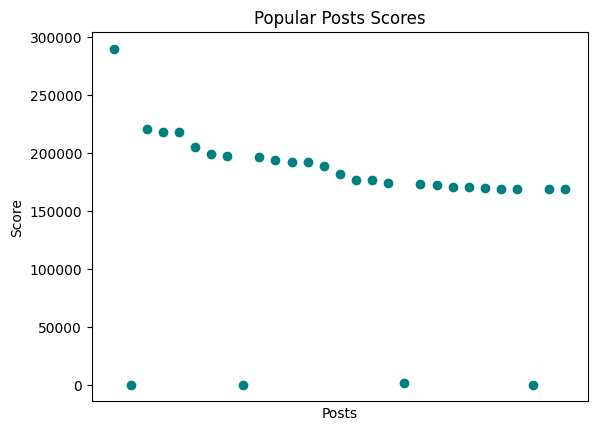

In [8]:
plt.title('Popular Posts Scores')
plt.ylabel('Score')
plt.xlabel('Posts')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)

x = popular_posts_df['id']
y = popular_posts_df['score']
plt.plot(x, y, "o", color="teal")
      
plt.show()

In [9]:
popular_posts_df.query('score < 50000')

,id,title,numComments,score,author,authorId,goldCount,domain
1,t3_187p59c,YSK MTN DEW GAME FUEL is back! Partnering with...,0,0,MTNDEWGaming,t2_t4otn2sq,0,mountaindew.com
8,t3_17g82xx,"r/gaming, what Mtn Dew flavor pairs best with ...",452,0,MtnDewOfficial,t2_ao7d8uab,0,mountaindew.com
18,t3_16uc8la,What would the world look like without US mili...,1263,1332,call_of_war_player,t2_vj2jjxzt,0,callofwar.com
26,t3_17wva9w,Your favorite game is iconic. Make it official...,0,18,PringlesUS,t2_apioax4u,0,ign.com


In [10]:
popular_posts_df.query('score > 250000')

,id,title,numComments,score,author,authorId,goldCount,domain
0,t3_11ia0od,"Hi, I’m Keanu Reeves, AMA",32997,290221,lionsgate,t2_2yjg9dt0,21,i.redd.it


<Axes: title={'center': 'Popular Posts Number of Comments'}, xlabel='Number of Comments', ylabel='Count'>

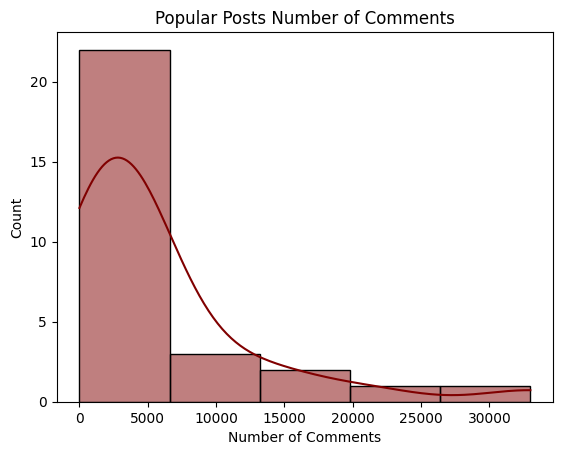

In [11]:
plt.title('Popular Posts Number of Comments')
plt.ylabel('Count')
plt.xlabel('Number of Comments')
sns.histplot(data=popular_posts_df, x='numComments', bins=5,  kde=True, color='maroon' )

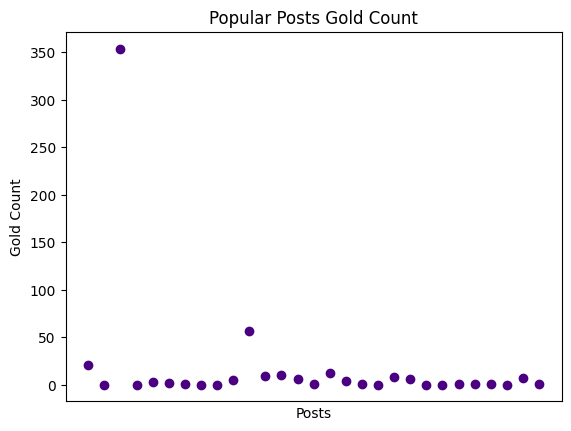

In [12]:
plt.title('Popular Posts Gold Count')
plt.ylabel('Gold Count')
plt.xlabel('Posts')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)

x = popular_posts_df['id']
y = popular_posts_df['goldCount']
plt.plot(x, y, "o", color="indigo")
      
plt.show()

In [13]:
popular_posts_df.query('goldCount > 300')

,id,title,numComments,score,author,authorId,goldCount,domain
2,t3_144f6xm,📣 Apollo will close down on June 30th. Reddit’...,15438,220416,iamthatis,t2_4mwol,354,self.apolloapp


<Axes: title={'center': 'Popular Posts Number of Comments and Score'}, xlabel='numComments', ylabel='Score'>

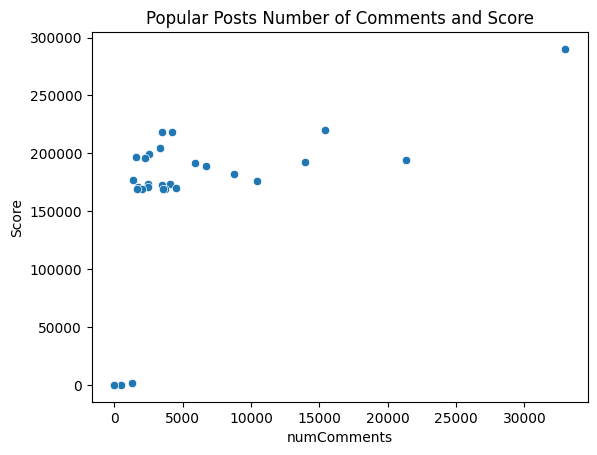

In [18]:
plt.title('Popular Posts Number of Comments and Score')
plt.ylabel('Score')
plt.xlabel('numComments')
sns.scatterplot(data=popular_posts_df,
                x="numComments",
                y="score",
                )


In [35]:
matrix = popular_posts_df[['numComments', 'score', 'goldCount']].corr()

In [36]:
matrix

,numComments,score,goldCount
numComments,1.000000,0.516468,0.367240
score,0.516468,1.000000,0.197994
goldCount,0.367240,0.197994,1.000000


<Axes: >

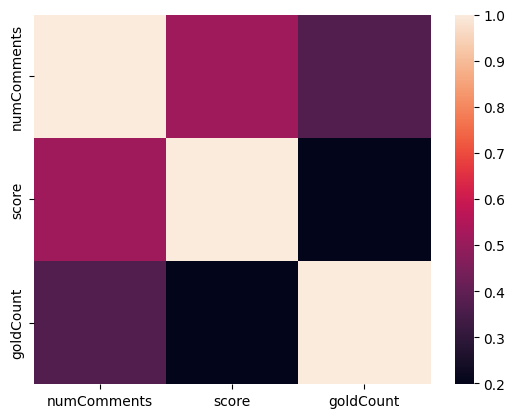

In [37]:
# There is no corelationn
sns.heatmap(matrix, 
            xticklabels=matrix.columns.values,
            yticklabels=matrix.columns.values)

In [20]:
ds_posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28 non-null     object
 1   title        28 non-null     object
 2   numComments  28 non-null     int64 
 3   score        28 non-null     int64 
 4   author       28 non-null     object
 5   authorId     28 non-null     object
 6   goldCount    28 non-null     int64 
 7   domain       28 non-null     object
 8   post_text    24 non-null     object
dtypes: int64(3), object(6)
memory usage: 2.1+ KB


In [21]:
ds_posts_df.describe()

,numComments,score,goldCount
count,28.000000,28.000000,28.0
mean,42.107143,51.892857,0.0
std,52.607097,75.182415,0.0
min,0.000000,0.000000,0.0
25%,7.250000,5.500000,0.0
50%,23.000000,27.000000,0.0
75%,55.000000,64.500000,0.0
max,197.000000,363.000000,0.0


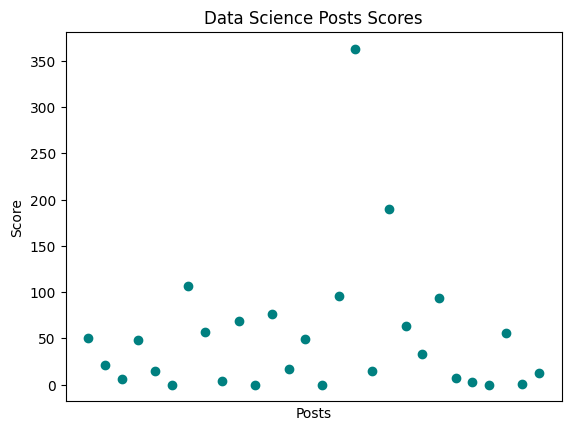

In [24]:
plt.title('Data Science Posts Scores')
plt.ylabel('Score')
plt.xlabel('Posts')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)

x = ds_posts_df['id']
y = ds_posts_df['score']
plt.plot(x, y, "o", color="teal")
      
plt.show()

<Axes: title={'center': 'Data Science Posts Number of Comments'}, xlabel='Number of Comments', ylabel='Count'>

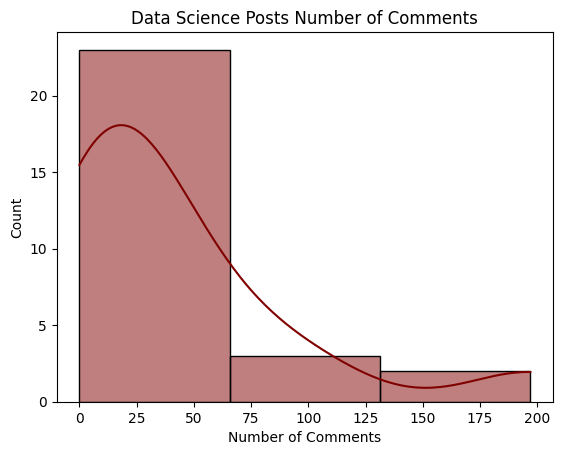

In [26]:
plt.title('Data Science Posts Number of Comments')
plt.ylabel('Count')
plt.xlabel('Number of Comments')
sns.histplot(data=ds_posts_df, x='numComments', bins=3,  kde=True, color='maroon' )

<Axes: title={'center': 'Data Science Posts Number of Comments and Score'}, xlabel='numComments', ylabel='Score'>

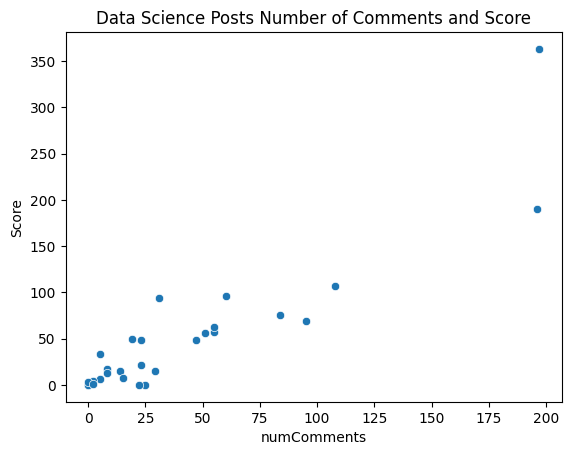

In [27]:
plt.title('Data Science Posts Number of Comments and Score')
plt.ylabel('Score')
plt.xlabel('numComments')
sns.scatterplot(data=ds_posts_df,
                x="numComments",
                y="score",
                )


In [30]:
matrix = popular_posts_df[['numComments', 'score']].corr()

In [31]:
# There is no corelation with comment numbers and score
matrix

,numComments,score
numComments,1.000000,0.516468
score,0.516468,1.000000


<Axes: >

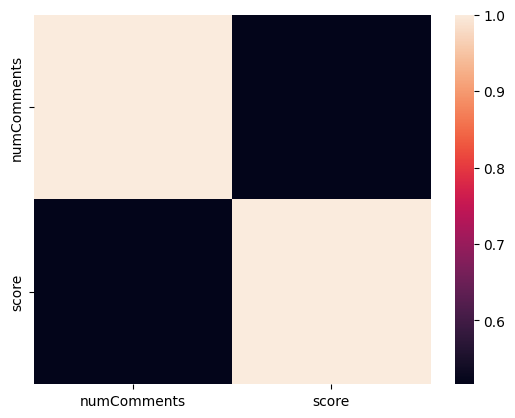

In [33]:
sns.heatmap(matrix, 
            xticklabels=matrix.columns.values,
            yticklabels=matrix.columns.values)